###  Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
from collections import Counter
np.random.seed(2)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

### Data processing

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

####  Splitting data

In [5]:
data = data.drop(['Amount', 'Time'], axis = 1)
y = data['Class']
X = data.drop(['Class'], axis = 1)

In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Converting data

In [8]:
train_identity = X_train.index
test_identity = X_test.index


In [9]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Using Deep neural network

####  Model creation

In [10]:
model = Sequential()
#add input layer
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

####  Fitting model

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 10s 787us/step - loss: 0.0094 - accuracy: 0.9984s - - ETA: 2s - loss: 0.0108 - ac - ETA: 2s - - ETA: 1s - loss: 0.0100 - accuracy - ETA: 1s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.0095 - accuracy: 
Epoch 2/5
13291/13291 [==============================] - 11s 854us/step - loss: 0.0041 - accuracy: 0.9992A: 12s - loss: 0.0071 - ETA: 8s - loss: 0.0038 - accuracy - ETA: 7s - loss: 0.0045 - accu - ETA: 7s - loss: 0.0043 - accuracy: 0. - ETA: 7s - loss: 0.0
Epoch 3/5
13291/13291 [==============================] - 12s 867us/step - loss: 0.0038 - accuracy: 0.9993A: 3s - ETA:  - ETA: 2s - los - ETA: 1s - loss: 0.0038 - accu - ETA: 0s - loss: 0.0038 - ac - ETA: 0s - loss: 0.003
Epoch 4/5
13291/13291 [==============================] - 11s 792us/step - loss: 0.0038 - accuracy: 0.9993s - loss: 0.0042 -  - ETA: 3s - loss: 0.0040 - accuracy - ETA: 3s - loss: 0.0040 - accuracy: 0.99 - ETA: 3s - loss: 0.0040 - accura - ETA: 2s - 

#### Evaluating model

In [13]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 2s 695us/step - loss: 0.0035 - accuracy: 0.9993
[0.003512678435072303, 0.9993445873260498]


In [14]:
y_pred = model.predict(X_test)

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.GnBu):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "Red")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [16]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85269    27]
 [   29   118]]


Confusion matrix, without normalization


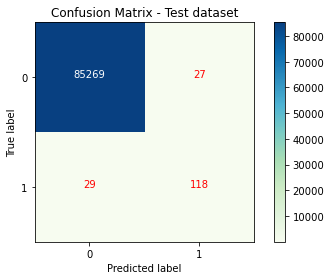

In [17]:
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

In [18]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9993445923013002
0.8137931034482758
0.8027210884353742
0.8082191780821918


####  Undersampling & model test
 

####  Undersampling

In [19]:
fraud_ind = np.array(data[data.Class == 1].index)
num_frauds = len(fraud_ind)
print(num_frauds)
normal_ind = np.array(data[data.Class == 0].index)
num_normal = len(normal_ind)
print(num_normal)

492
284315


In [20]:
normal_ind = data[data.Class == 0].index
random_normal_ind = np.random.choice(normal_ind, num_frauds, replace = False)
random_normal_ind = np.array(random_normal_ind)

In [21]:
print(len(random_normal_ind))

492


In [22]:
under_sample_ind = np.concatenate( [fraud_ind, random_normal_ind])

In [23]:
print(len(under_sample_ind))

984


In [24]:
under_sample_data = data.iloc[under_sample_ind, :]

In [25]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### Model test

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [29]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
46/46 [==============================] - 0s 734us/step - loss: 0.3835 - accuracy: 0.9070
Epoch 2/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1749 - accuracy: 0.9375
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9404
Epoch 4/5
46/46 [==============================] - 0s 824us/step - loss: 0.1493 - accuracy: 0.9390
Epoch 5/5
46/46 [==============================] - 0s 824us/step - loss: 0.1427 - accuracy: 0.9433


In [30]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


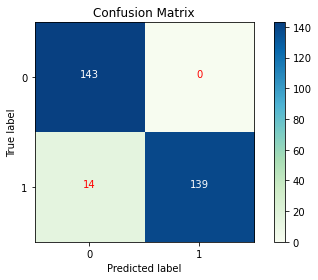

In [31]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [32]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9527027027027027
1.0
0.9084967320261438
0.952054794520548


#### SMOTE & Model test

####  SMOTE
Note - sampling is performed before data spliting which should be the case if future data is unbalanced

In [33]:
import sklearn

oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X, y)

In [34]:
X_resample.shape

(568630, 29)

In [35]:
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [37]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

####  Model test

In [38]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
26537/26537 [==============================] - 21s 786us/step - loss: 0.0270 - accuracy: 0.9909s -
Epoch 2/5
26537/26537 [==============================] - 20s 764us/step - loss: 0.0123 - accuracy: 0.9969
Epoch 3/5
26537/26537 [==============================] - 22s 825us/step - loss: 0.0099 - accuracy: 0.9975 10s - E - ETA: 1s - loss: 0
Epoch 4/5
26537/26537 [==============================] - 25s 939us/step - loss: 0.0090 - accuracy: 0.9978s - loss: 0.0091 - accuracy:  - ETA: 4s - loss: 0.0091  - ETA: 3s - loss: 0.0091 - accuracy: 0.99 - ETA: 3s - ETA: 2s - loss: 0.0090 - accuracy:  - ETA: 2s - loss: - ETA: 1s - loss: 0.0090 - accuracy:  - ETA:  - ETA: 0s - loss: 0.0090 
Epoch 5/5
26537/26537 [==============================] - 24s 890us/step - loss: 0.0082 - accuracy: 0.9981 13s - loss: 0 - ETA: 1 - ETA: 10s - - ETA: 8s - loss: 0.0 - ETA: 7s - loss: 0.0081 - accuracy: 0. - ETA: 7s - loss: 0.0081 - accuracy - ETA: 7s - loss: - ETA


In [39]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


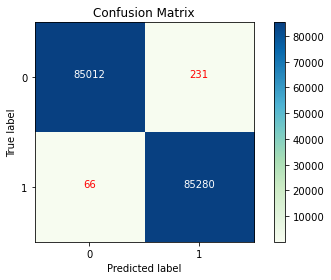

In [40]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [41]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9982589733218438
0.9972985931634527
0.9992266772900897
0.9982617042321942
